# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/ajahanderson/Documents/Book Data'

In [4]:
df = pd.read_csv(os.path.join(path,'2 Data','Prepared Data','book_dataset_cleaned.csv'),index_col = False)

In [5]:
df.head()

,Unnamed: 0,ID,Date,Time,Qtr,Special Day,Online Sale Offers,Day of week,Gender,Customer ID,...,Ship-City,Ship-State,Ship-Postal-Code,Category,Total,Author,Publication,Profit %,Profit (INR),Cost Price
0,0,1,2018-01-01,08:57:00,1,1,1,1,F,B07FWXWZT,...,Hyderabad,Telangana,500073,College,1084.0,Avi Silberschatz,Mcgraw-Hill,13,129.87,869.13
1,1,2,2018-01-02,02:04:00,1,1,1,2,M,B07FWVXXU,...,Dharmapuri,Tamil Nadu,636701,Competition,725.0,Team Of Engineers Academy,Engineers Academy Publication,17,108.80,531.20
2,2,3,2018-01-03,05:08:00,1,1,1,3,M,B07FWVXZS,...,Guwahati,Assam,781024,Competition,800.0,Dr. Mohammed Ali,Bhuteraenterprises,17,121.55,593.45
3,3,4,2018-01-04,16:06:00,1,0,1,4,F,B07FWYXVQ,...,Palani,Tamil Nadu,624601,College,650.0,N Subrahmanyam,S. Chand Publishing,13,73.45,491.55
4,4,5,2018-01-04,20:12:00,1,0,0,4,F,B07FWXATQ,...,Patna,Bihar,800013,College,579.0,Duggal,Mcgraw Hill Education,13,64.22,429.78


In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df = df[df['Total'] < 1600]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3440 entries, 0 to 3479
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3440 non-null   int64  
 1   Date                3440 non-null   object 
 2   Time                3440 non-null   object 
 3   Qtr                 3440 non-null   int64  
 4   Special Day         3440 non-null   int64  
 5   Online Sale Offers  3440 non-null   int64  
 6   Day of week         3440 non-null   int64  
 7   Gender              3440 non-null   object 
 8   Customer ID         3440 non-null   object 
 9   Product-Name        3440 non-null   object 
 10  Item-Status         3440 non-null   object 
 11  Quantity            3440 non-null   int64  
 12  Item Price          3440 non-null   float64
 13  Shipping-Price      3440 non-null   float64
 14  Ship-City           3440 non-null   object 
 15  Ship-State          3440 non-null   object 
 16  Ship-Postal

In [9]:
#
sub = df[['Date','Time','Quantity', 'Item Price', 'Shipping-Price', 'Total', 'Profit %', 'Profit (INR)', 'Cost Price']]


In [10]:
sub.head(10)

,Date,Time,Quantity,Item Price,Shipping-Price,Total,Profit %,Profit (INR),Cost Price
0,2018-01-01,08:57:00,1,999.0,85.0,1084.0,13,129.87,869.13
1,2018-01-02,02:04:00,1,640.0,85.0,725.0,17,108.80,531.20
2,2018-01-03,05:08:00,1,715.0,85.0,800.0,17,121.55,593.45
3,2018-01-04,16:06:00,1,565.0,85.0,650.0,13,73.45,491.55
4,2018-01-04,20:12:00,1,494.0,85.0,579.0,13,64.22,429.78
5,2018-01-05,02:25:00,1,425.0,85.0,510.0,13,55.25,369.75
6,2018-01-05,02:59:00,1,565.0,85.0,650.0,13,73.45,491.55
7,2018-01-05,10:46:00,1,565.0,85.0,650.0,13,73.45,491.55
8,2018-01-06,03:11:00,1,200.0,85.0,285.0,17,34.00,166.00
9,2018-01-06,05:30:00,1,610.0,85.0,695.0,17,103.70,506.30


In [62]:
subset = df.groupby('Date')['Profit (INR)'].mean().reset_index()
subset


,Date,Profit (INR)
0,2018-01-01,129.870000
1,2018-01-02,108.800000
2,2018-01-03,121.550000
3,2018-01-04,68.835000
4,2018-01-05,67.383333
...,...,...
718,2019-12-27,98.988000
719,2019-12-28,32.825000
720,2019-12-29,121.727500
721,2019-12-30,176.690000


In [63]:
# Set the "Date" column as the index

from datetime import datetime

subset['datetime'] = pd.to_datetime(subset['Date']) # Create a datetime column from "Date.""
subset = subset.set_index('datetime') # Set the datetime as the index of the dataframe.
subset.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
subset.head()

,Profit (INR)
datetime,
2018-01-01,129.870000
2018-01-02,108.800000
2018-01-03,121.550000
2018-01-04,68.835000
2018-01-05,67.383333


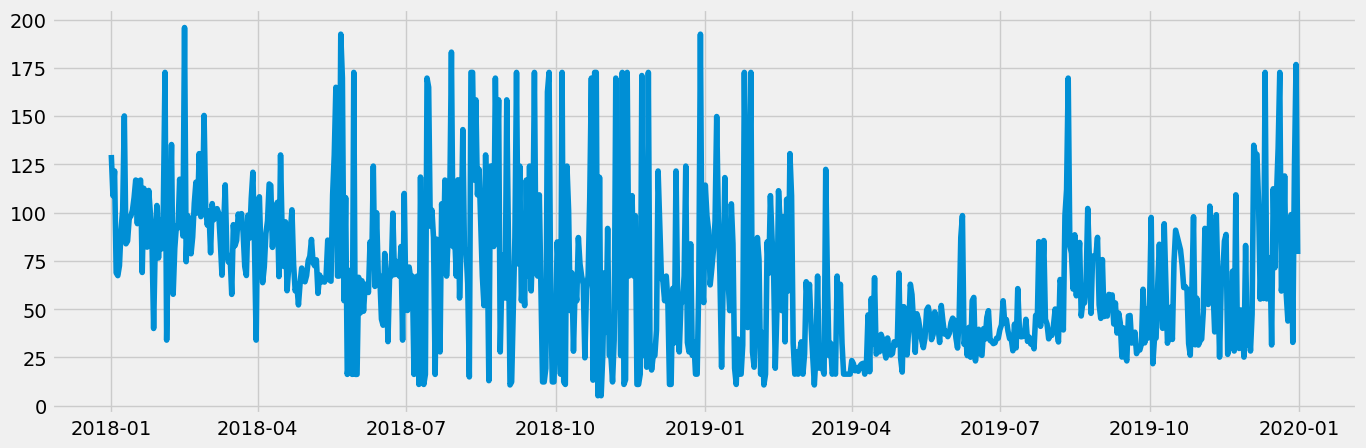

In [64]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(subset)

In [65]:
# Check for missing values
subset.isnull().sum() 

Profit (INR)    0
dtype: int64

In [66]:
subset.shape

(723, 1)

### 3. Time-series analysis: decomposition

In [67]:

subset.head()

,Profit (INR)
datetime,
2018-01-01,129.870000
2018-01-02,108.800000
2018-01-03,121.550000
2018-01-04,68.835000
2018-01-05,67.383333


In [68]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive',period=20)


In [69]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

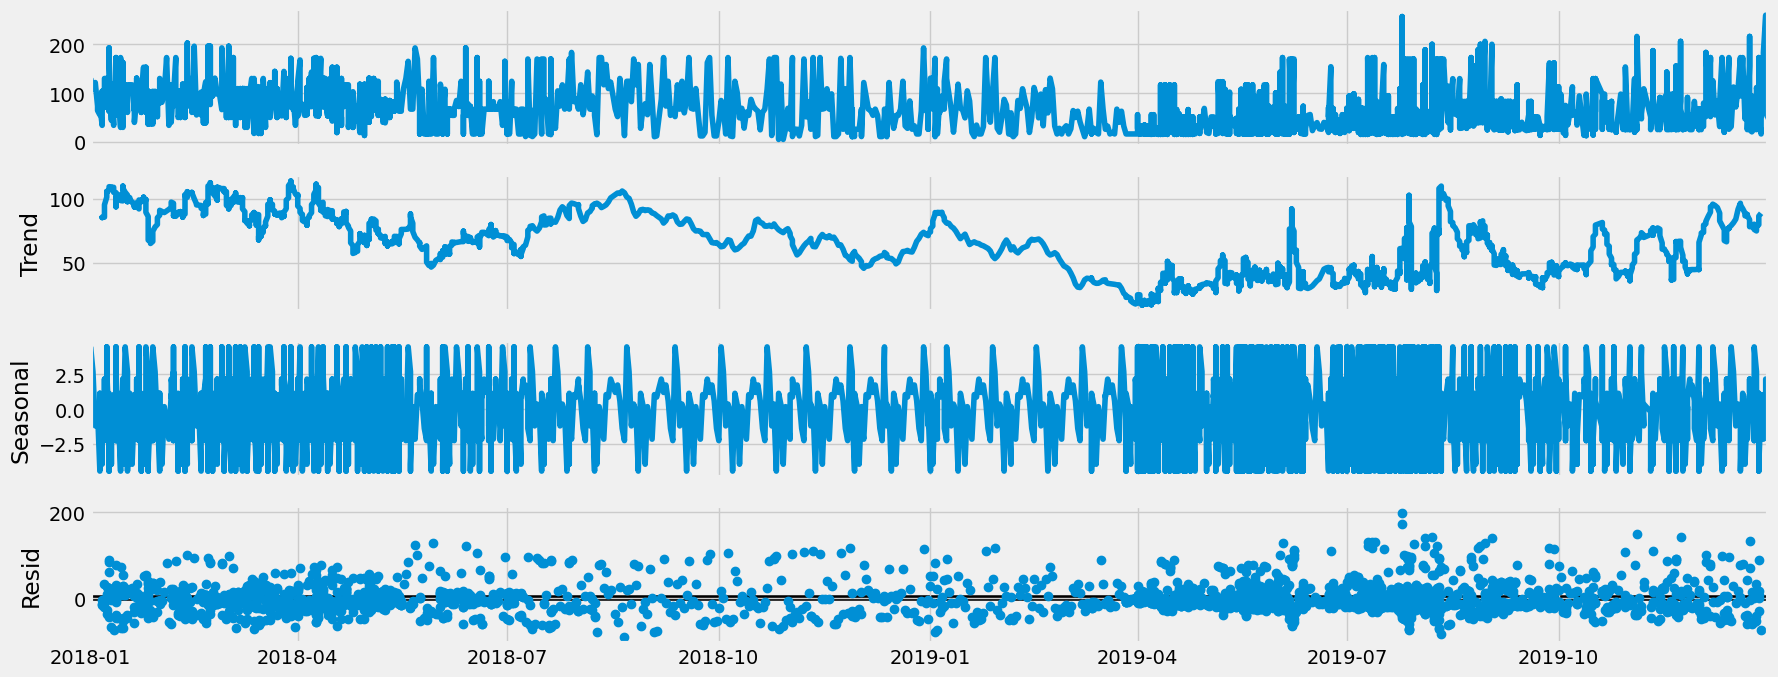

In [70]:
# Plot the separate components

decomposition.plot()
plt.show()

 a noticeable downward trend emerges around September 2018, followed by a subsequent upward turn in August 2019. This pattern suggests a cyclic behavior rather than a typical seasonal fluctuation.

In [74]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Profit (INR)'])

Dickey-Fuller Stationarity test:
Test Statistic                   -3.809554
p-value                           0.002811
Number of Lags Used              30.000000
Number of Observations Used    3409.000000
Critical Value (1%)              -3.432270
Critical Value (5%)              -2.862388
Critical Value (10%)             -2.567222
dtype: float64


Upon comparing the test statistic to the critical values at the 5% and 10% significance levels, it is observed that the test statistic is smaller than the critical values. Additionally, the obtained p-value is satisfactory. These findings collectively support our rejection of the null hypothesis and provide evidence against the presence of a unit root in the data.

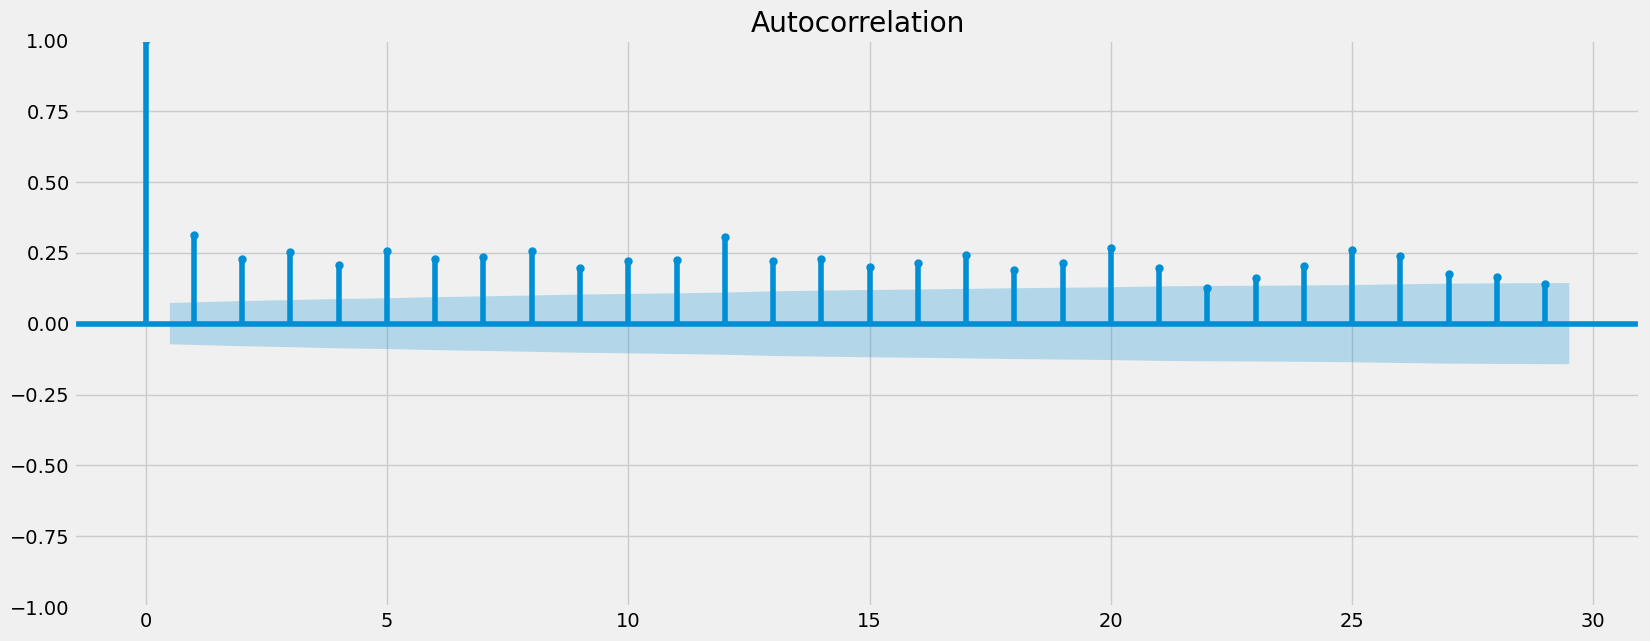

In [75]:
# Check out a plot of autocorrelations
plot_acf(subset)
plt.show()